# Fetch random image from the test set and find its best match from the train set

### Necessary imports

In [1]:
import pickle
import glob
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

from utils import load_dataset, get_img_features, get_best_match

### Load SIFT features dataset

In [2]:
SIFT_features = load_dataset('SIFT_features')

### Pick an image from the test set randomly

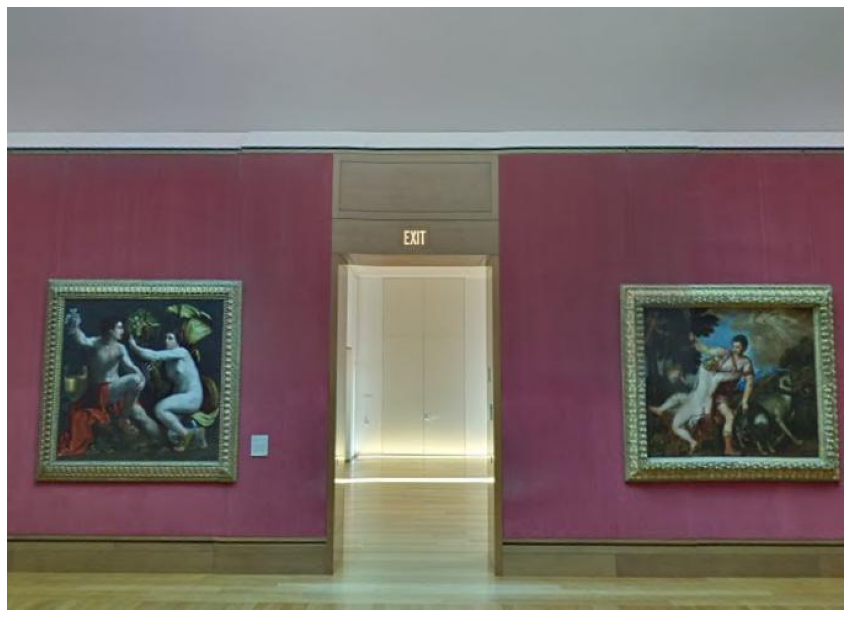

In [7]:
# Get list of all images
img_paths = glob.glob('./Dataset/test/*')

# Pick an image randomly
i = np.random.randint(0, len(img_paths))
img_path = img_paths[i]

# Load image
img = cv.cvtColor(cv.imread(img_path), cv.COLOR_RGB2BGR)

# Plot
plt.subplots(figsize = (15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

### Look for best SIFT match in train images

In [44]:
best_img_name, good_matches, [kp_query, kp_match] = get_best_match(img, SIFT_features)

# DO SOMETHING IF NO GOOD MATCHES ARE FOUND (WALL IMAGES)

Image 1 of 7500. Best match so far: 0 points.
Image 2 of 7500. Best match so far: 11 points.
Image 3 of 7500. Best match so far: 11 points.
Image 4 of 7500. Best match so far: 11 points.
Image 5 of 7500. Best match so far: 11 points.
Image 6 of 7500. Best match so far: 11 points.
Image 7 of 7500. Best match so far: 11 points.
Image 8 of 7500. Best match so far: 11 points.
Image 9 of 7500. Best match so far: 11 points.
Image 10 of 7500. Best match so far: 11 points.
Image 11 of 7500. Best match so far: 11 points.
Image 12 of 7500. Best match so far: 11 points.
Image 13 of 7500. Best match so far: 11 points.
Image 14 of 7500. Best match so far: 14 points.
Image 15 of 7500. Best match so far: 14 points.
Image 16 of 7500. Best match so far: 14 points.
Image 17 of 7500. Best match so far: 14 points.
Image 18 of 7500. Best match so far: 14 points.
Image 19 of 7500. Best match so far: 14 points.
Image 20 of 7500. Best match so far: 14 points.
Image 21 of 7500. Best match so far: 17 points.
Im

Image 174 of 7500. Best match so far: 18 points.
Image 175 of 7500. Best match so far: 18 points.
Image 176 of 7500. Best match so far: 18 points.
Image 177 of 7500. Best match so far: 18 points.
Image 178 of 7500. Best match so far: 18 points.
Image 179 of 7500. Best match so far: 18 points.
Image 180 of 7500. Best match so far: 18 points.
Image 181 of 7500. Best match so far: 18 points.
Image 182 of 7500. Best match so far: 18 points.
Image 183 of 7500. Best match so far: 18 points.
Image 184 of 7500. Best match so far: 18 points.
Image 185 of 7500. Best match so far: 18 points.
Image 186 of 7500. Best match so far: 18 points.
Image 187 of 7500. Best match so far: 18 points.
Image 188 of 7500. Best match so far: 18 points.
Image 189 of 7500. Best match so far: 18 points.
Image 190 of 7500. Best match so far: 18 points.
Image 191 of 7500. Best match so far: 18 points.
Image 192 of 7500. Best match so far: 18 points.
Image 193 of 7500. Best match so far: 18 points.
Image 194 of 7500. B

Image 342 of 7500. Best match so far: 19 points.
Image 343 of 7500. Best match so far: 19 points.
Image 344 of 7500. Best match so far: 19 points.
Image 345 of 7500. Best match so far: 19 points.
Image 346 of 7500. Best match so far: 19 points.
Image 347 of 7500. Best match so far: 19 points.
Image 348 of 7500. Best match so far: 19 points.
Image 349 of 7500. Best match so far: 19 points.
Image 350 of 7500. Best match so far: 19 points.
Image 351 of 7500. Best match so far: 19 points.
Image 352 of 7500. Best match so far: 19 points.
Image 353 of 7500. Best match so far: 19 points.
Image 354 of 7500. Best match so far: 19 points.
Image 355 of 7500. Best match so far: 19 points.
Image 356 of 7500. Best match so far: 19 points.
Image 357 of 7500. Best match so far: 19 points.
Image 358 of 7500. Best match so far: 19 points.
Image 359 of 7500. Best match so far: 19 points.
Image 360 of 7500. Best match so far: 19 points.
Image 361 of 7500. Best match so far: 19 points.
Image 362 of 7500. B

Image 514 of 7500. Best match so far: 19 points.
Image 515 of 7500. Best match so far: 19 points.
Image 516 of 7500. Best match so far: 19 points.
Image 517 of 7500. Best match so far: 19 points.
Image 518 of 7500. Best match so far: 19 points.
Image 519 of 7500. Best match so far: 19 points.
Image 520 of 7500. Best match so far: 19 points.
Image 521 of 7500. Best match so far: 19 points.
Image 522 of 7500. Best match so far: 19 points.
Image 523 of 7500. Best match so far: 19 points.
Image 524 of 7500. Best match so far: 19 points.
Image 525 of 7500. Best match so far: 19 points.
Image 526 of 7500. Best match so far: 19 points.
Image 527 of 7500. Best match so far: 21 points.
Image 528 of 7500. Best match so far: 21 points.
Image 529 of 7500. Best match so far: 21 points.
Image 530 of 7500. Best match so far: 21 points.
Image 531 of 7500. Best match so far: 21 points.
Image 532 of 7500. Best match so far: 21 points.
Image 533 of 7500. Best match so far: 21 points.
Image 534 of 7500. B

Image 687 of 7500. Best match so far: 23 points.
Image 688 of 7500. Best match so far: 23 points.
Image 689 of 7500. Best match so far: 23 points.
Image 690 of 7500. Best match so far: 23 points.
Image 691 of 7500. Best match so far: 23 points.
Image 692 of 7500. Best match so far: 23 points.
Image 693 of 7500. Best match so far: 23 points.
Image 694 of 7500. Best match so far: 23 points.
Image 695 of 7500. Best match so far: 23 points.
Image 696 of 7500. Best match so far: 23 points.
Image 697 of 7500. Best match so far: 23 points.
Image 698 of 7500. Best match so far: 23 points.
Image 699 of 7500. Best match so far: 23 points.
Image 700 of 7500. Best match so far: 23 points.
Image 701 of 7500. Best match so far: 23 points.
Image 702 of 7500. Best match so far: 23 points.
Image 703 of 7500. Best match so far: 23 points.
Image 704 of 7500. Best match so far: 23 points.
Image 705 of 7500. Best match so far: 23 points.
Image 706 of 7500. Best match so far: 23 points.
Image 707 of 7500. B

Image 857 of 7500. Best match so far: 23 points.
Image 858 of 7500. Best match so far: 23 points.
Image 859 of 7500. Best match so far: 23 points.
Image 860 of 7500. Best match so far: 23 points.
Image 861 of 7500. Best match so far: 23 points.
Image 862 of 7500. Best match so far: 23 points.
Image 863 of 7500. Best match so far: 23 points.
Image 864 of 7500. Best match so far: 23 points.
Image 865 of 7500. Best match so far: 23 points.
Image 866 of 7500. Best match so far: 23 points.
Image 867 of 7500. Best match so far: 23 points.
Image 868 of 7500. Best match so far: 23 points.
Image 869 of 7500. Best match so far: 23 points.
Image 870 of 7500. Best match so far: 23 points.
Image 871 of 7500. Best match so far: 23 points.
Image 872 of 7500. Best match so far: 23 points.
Image 873 of 7500. Best match so far: 23 points.
Image 874 of 7500. Best match so far: 23 points.
Image 875 of 7500. Best match so far: 23 points.
Image 876 of 7500. Best match so far: 23 points.
Image 877 of 7500. B

Image 1026 of 7500. Best match so far: 23 points.
Image 1027 of 7500. Best match so far: 23 points.
Image 1028 of 7500. Best match so far: 23 points.
Image 1029 of 7500. Best match so far: 23 points.
Image 1030 of 7500. Best match so far: 23 points.
Image 1031 of 7500. Best match so far: 23 points.
Image 1032 of 7500. Best match so far: 23 points.
Image 1033 of 7500. Best match so far: 23 points.
Image 1034 of 7500. Best match so far: 23 points.
Image 1035 of 7500. Best match so far: 23 points.
Image 1036 of 7500. Best match so far: 23 points.
Image 1037 of 7500. Best match so far: 23 points.
Image 1038 of 7500. Best match so far: 23 points.
Image 1039 of 7500. Best match so far: 23 points.
Image 1040 of 7500. Best match so far: 23 points.
Image 1041 of 7500. Best match so far: 23 points.
Image 1042 of 7500. Best match so far: 23 points.
Image 1043 of 7500. Best match so far: 23 points.
Image 1044 of 7500. Best match so far: 23 points.
Image 1045 of 7500. Best match so far: 23 points.


Image 1192 of 7500. Best match so far: 26 points.
Image 1193 of 7500. Best match so far: 26 points.
Image 1194 of 7500. Best match so far: 26 points.
Image 1195 of 7500. Best match so far: 26 points.
Image 1196 of 7500. Best match so far: 26 points.
Image 1197 of 7500. Best match so far: 26 points.
Image 1198 of 7500. Best match so far: 26 points.
Image 1199 of 7500. Best match so far: 26 points.
Image 1200 of 7500. Best match so far: 26 points.
Image 1201 of 7500. Best match so far: 26 points.
Image 1202 of 7500. Best match so far: 26 points.
Image 1203 of 7500. Best match so far: 26 points.
Image 1204 of 7500. Best match so far: 26 points.
Image 1205 of 7500. Best match so far: 26 points.
Image 1206 of 7500. Best match so far: 26 points.
Image 1207 of 7500. Best match so far: 26 points.
Image 1208 of 7500. Best match so far: 26 points.
Image 1209 of 7500. Best match so far: 26 points.
Image 1210 of 7500. Best match so far: 26 points.
Image 1211 of 7500. Best match so far: 26 points.


Image 1362 of 7500. Best match so far: 30 points.
Image 1363 of 7500. Best match so far: 30 points.
Image 1364 of 7500. Best match so far: 30 points.
Image 1365 of 7500. Best match so far: 30 points.
Image 1366 of 7500. Best match so far: 30 points.
Image 1367 of 7500. Best match so far: 30 points.
Image 1368 of 7500. Best match so far: 30 points.
Image 1369 of 7500. Best match so far: 30 points.
Image 1370 of 7500. Best match so far: 30 points.
Image 1371 of 7500. Best match so far: 30 points.
Image 1372 of 7500. Best match so far: 30 points.
Image 1373 of 7500. Best match so far: 30 points.
Image 1374 of 7500. Best match so far: 30 points.
Image 1375 of 7500. Best match so far: 30 points.
Image 1376 of 7500. Best match so far: 30 points.
Image 1377 of 7500. Best match so far: 30 points.
Image 1378 of 7500. Best match so far: 30 points.
Image 1379 of 7500. Best match so far: 30 points.
Image 1380 of 7500. Best match so far: 30 points.
Image 1381 of 7500. Best match so far: 30 points.


Image 1527 of 7500. Best match so far: 30 points.
Image 1528 of 7500. Best match so far: 30 points.
Image 1529 of 7500. Best match so far: 30 points.
Image 1530 of 7500. Best match so far: 30 points.
Image 1531 of 7500. Best match so far: 30 points.
Image 1532 of 7500. Best match so far: 30 points.
Image 1533 of 7500. Best match so far: 30 points.
Image 1534 of 7500. Best match so far: 30 points.
Image 1535 of 7500. Best match so far: 30 points.
Image 1536 of 7500. Best match so far: 30 points.
Image 1537 of 7500. Best match so far: 30 points.
Image 1538 of 7500. Best match so far: 30 points.
Image 1539 of 7500. Best match so far: 30 points.
Image 1540 of 7500. Best match so far: 30 points.
Image 1541 of 7500. Best match so far: 30 points.
Image 1542 of 7500. Best match so far: 30 points.
Image 1543 of 7500. Best match so far: 30 points.
Image 1544 of 7500. Best match so far: 30 points.
Image 1545 of 7500. Best match so far: 30 points.
Image 1546 of 7500. Best match so far: 30 points.


Image 1698 of 7500. Best match so far: 30 points.
Image 1699 of 7500. Best match so far: 30 points.
Image 1700 of 7500. Best match so far: 30 points.
Image 1701 of 7500. Best match so far: 30 points.
Image 1702 of 7500. Best match so far: 30 points.
Image 1703 of 7500. Best match so far: 30 points.
Image 1704 of 7500. Best match so far: 30 points.
Image 1705 of 7500. Best match so far: 30 points.
Image 1706 of 7500. Best match so far: 30 points.
Image 1707 of 7500. Best match so far: 30 points.
Image 1708 of 7500. Best match so far: 30 points.
Image 1709 of 7500. Best match so far: 30 points.
Image 1710 of 7500. Best match so far: 30 points.
Image 1711 of 7500. Best match so far: 30 points.
Image 1712 of 7500. Best match so far: 30 points.
Image 1713 of 7500. Best match so far: 30 points.
Image 1714 of 7500. Best match so far: 30 points.
Image 1715 of 7500. Best match so far: 30 points.
Image 1716 of 7500. Best match so far: 30 points.
Image 1717 of 7500. Best match so far: 30 points.


Image 1863 of 7500. Best match so far: 30 points.
Image 1864 of 7500. Best match so far: 30 points.
Image 1865 of 7500. Best match so far: 30 points.
Image 1866 of 7500. Best match so far: 30 points.
Image 1867 of 7500. Best match so far: 30 points.
Image 1868 of 7500. Best match so far: 30 points.
Image 1869 of 7500. Best match so far: 30 points.
Image 1870 of 7500. Best match so far: 30 points.
Image 1871 of 7500. Best match so far: 30 points.
Image 1872 of 7500. Best match so far: 30 points.
Image 1873 of 7500. Best match so far: 30 points.
Image 1874 of 7500. Best match so far: 30 points.
Image 1875 of 7500. Best match so far: 30 points.
Image 1876 of 7500. Best match so far: 30 points.
Image 1877 of 7500. Best match so far: 30 points.
Image 1878 of 7500. Best match so far: 30 points.
Image 1879 of 7500. Best match so far: 30 points.
Image 1880 of 7500. Best match so far: 30 points.
Image 1881 of 7500. Best match so far: 30 points.
Image 1882 of 7500. Best match so far: 30 points.


Image 2030 of 7500. Best match so far: 30 points.
Image 2031 of 7500. Best match so far: 30 points.
Image 2032 of 7500. Best match so far: 30 points.
Image 2033 of 7500. Best match so far: 30 points.
Image 2034 of 7500. Best match so far: 30 points.
Image 2035 of 7500. Best match so far: 30 points.
Image 2036 of 7500. Best match so far: 30 points.
Image 2037 of 7500. Best match so far: 30 points.
Image 2038 of 7500. Best match so far: 30 points.
Image 2039 of 7500. Best match so far: 30 points.
Image 2040 of 7500. Best match so far: 30 points.
Image 2041 of 7500. Best match so far: 30 points.
Image 2042 of 7500. Best match so far: 30 points.
Image 2043 of 7500. Best match so far: 30 points.
Image 2044 of 7500. Best match so far: 30 points.
Image 2045 of 7500. Best match so far: 30 points.
Image 2046 of 7500. Best match so far: 30 points.
Image 2047 of 7500. Best match so far: 30 points.
Image 2048 of 7500. Best match so far: 30 points.
Image 2049 of 7500. Best match so far: 30 points.


Image 2199 of 7500. Best match so far: 30 points.
Image 2200 of 7500. Best match so far: 30 points.
Image 2201 of 7500. Best match so far: 30 points.
Image 2202 of 7500. Best match so far: 30 points.
Image 2203 of 7500. Best match so far: 30 points.
Image 2204 of 7500. Best match so far: 30 points.
Image 2205 of 7500. Best match so far: 30 points.
Image 2206 of 7500. Best match so far: 30 points.
Image 2207 of 7500. Best match so far: 30 points.
Image 2208 of 7500. Best match so far: 30 points.
Image 2209 of 7500. Best match so far: 30 points.
Image 2210 of 7500. Best match so far: 30 points.
Image 2211 of 7500. Best match so far: 30 points.
Image 2212 of 7500. Best match so far: 30 points.
Image 2213 of 7500. Best match so far: 30 points.
Image 2214 of 7500. Best match so far: 30 points.
Image 2215 of 7500. Best match so far: 30 points.
Image 2216 of 7500. Best match so far: 30 points.
Image 2217 of 7500. Best match so far: 30 points.
Image 2218 of 7500. Best match so far: 30 points.


Image 2363 of 7500. Best match so far: 30 points.
Image 2364 of 7500. Best match so far: 30 points.
Image 2365 of 7500. Best match so far: 30 points.
Image 2366 of 7500. Best match so far: 30 points.
Image 2367 of 7500. Best match so far: 30 points.
Image 2368 of 7500. Best match so far: 30 points.
Image 2369 of 7500. Best match so far: 30 points.
Image 2370 of 7500. Best match so far: 30 points.
Image 2371 of 7500. Best match so far: 30 points.
Image 2372 of 7500. Best match so far: 30 points.
Image 2373 of 7500. Best match so far: 30 points.
Image 2374 of 7500. Best match so far: 30 points.
Image 2375 of 7500. Best match so far: 30 points.
Image 2376 of 7500. Best match so far: 30 points.
Image 2377 of 7500. Best match so far: 30 points.
Image 2378 of 7500. Best match so far: 30 points.
Image 2379 of 7500. Best match so far: 30 points.
Image 2380 of 7500. Best match so far: 30 points.
Image 2381 of 7500. Best match so far: 30 points.
Image 2382 of 7500. Best match so far: 30 points.


Image 2528 of 7500. Best match so far: 59 points.
Image 2529 of 7500. Best match so far: 59 points.
Image 2530 of 7500. Best match so far: 59 points.
Image 2531 of 7500. Best match so far: 59 points.
Image 2532 of 7500. Best match so far: 59 points.
Image 2533 of 7500. Best match so far: 59 points.
Image 2534 of 7500. Best match so far: 59 points.
Image 2535 of 7500. Best match so far: 59 points.
Image 2536 of 7500. Best match so far: 59 points.
Image 2537 of 7500. Best match so far: 59 points.
Image 2538 of 7500. Best match so far: 59 points.
Image 2539 of 7500. Best match so far: 59 points.
Image 2540 of 7500. Best match so far: 59 points.
Image 2541 of 7500. Best match so far: 59 points.
Image 2542 of 7500. Best match so far: 59 points.
Image 2543 of 7500. Best match so far: 59 points.
Image 2544 of 7500. Best match so far: 59 points.
Image 2545 of 7500. Best match so far: 59 points.
Image 2546 of 7500. Best match so far: 59 points.
Image 2547 of 7500. Best match so far: 59 points.


Image 2697 of 7500. Best match so far: 59 points.
Image 2698 of 7500. Best match so far: 59 points.
Image 2699 of 7500. Best match so far: 59 points.
Image 2700 of 7500. Best match so far: 59 points.
Image 2701 of 7500. Best match so far: 59 points.
Image 2702 of 7500. Best match so far: 59 points.
Image 2703 of 7500. Best match so far: 59 points.
Image 2704 of 7500. Best match so far: 59 points.
Image 2705 of 7500. Best match so far: 59 points.
Image 2706 of 7500. Best match so far: 59 points.
Image 2707 of 7500. Best match so far: 59 points.
Image 2708 of 7500. Best match so far: 59 points.
Image 2709 of 7500. Best match so far: 59 points.
Image 2710 of 7500. Best match so far: 59 points.
Image 2711 of 7500. Best match so far: 59 points.
Image 2712 of 7500. Best match so far: 59 points.
Image 2713 of 7500. Best match so far: 59 points.
Image 2714 of 7500. Best match so far: 59 points.
Image 2715 of 7500. Best match so far: 59 points.
Image 2716 of 7500. Best match so far: 59 points.


Image 2861 of 7500. Best match so far: 59 points.
Image 2862 of 7500. Best match so far: 59 points.
Image 2863 of 7500. Best match so far: 59 points.
Image 2864 of 7500. Best match so far: 59 points.
Image 2865 of 7500. Best match so far: 59 points.
Image 2866 of 7500. Best match so far: 59 points.
Image 2867 of 7500. Best match so far: 59 points.
Image 2868 of 7500. Best match so far: 59 points.
Image 2869 of 7500. Best match so far: 59 points.
Image 2870 of 7500. Best match so far: 59 points.
Image 2871 of 7500. Best match so far: 59 points.
Image 2872 of 7500. Best match so far: 59 points.
Image 2873 of 7500. Best match so far: 59 points.
Image 2874 of 7500. Best match so far: 59 points.
Image 2875 of 7500. Best match so far: 59 points.
Image 2876 of 7500. Best match so far: 59 points.
Image 2877 of 7500. Best match so far: 59 points.
Image 2878 of 7500. Best match so far: 59 points.
Image 2879 of 7500. Best match so far: 59 points.
Image 2880 of 7500. Best match so far: 59 points.


Image 3028 of 7500. Best match so far: 59 points.
Image 3029 of 7500. Best match so far: 59 points.
Image 3030 of 7500. Best match so far: 59 points.
Image 3031 of 7500. Best match so far: 59 points.
Image 3032 of 7500. Best match so far: 59 points.
Image 3033 of 7500. Best match so far: 59 points.
Image 3034 of 7500. Best match so far: 59 points.
Image 3035 of 7500. Best match so far: 59 points.
Image 3036 of 7500. Best match so far: 59 points.
Image 3037 of 7500. Best match so far: 59 points.
Image 3038 of 7500. Best match so far: 59 points.
Image 3039 of 7500. Best match so far: 59 points.
Image 3040 of 7500. Best match so far: 59 points.
Image 3041 of 7500. Best match so far: 59 points.
Image 3042 of 7500. Best match so far: 59 points.
Image 3043 of 7500. Best match so far: 59 points.
Image 3044 of 7500. Best match so far: 59 points.
Image 3045 of 7500. Best match so far: 59 points.
Image 3046 of 7500. Best match so far: 59 points.
Image 3047 of 7500. Best match so far: 59 points.


Image 3195 of 7500. Best match so far: 59 points.
Image 3196 of 7500. Best match so far: 59 points.
Image 3197 of 7500. Best match so far: 59 points.
Image 3198 of 7500. Best match so far: 59 points.
Image 3199 of 7500. Best match so far: 59 points.
Image 3200 of 7500. Best match so far: 59 points.
Image 3201 of 7500. Best match so far: 59 points.
Image 3202 of 7500. Best match so far: 59 points.
Image 3203 of 7500. Best match so far: 59 points.
Image 3204 of 7500. Best match so far: 59 points.
Image 3205 of 7500. Best match so far: 59 points.
Image 3206 of 7500. Best match so far: 59 points.
Image 3207 of 7500. Best match so far: 59 points.
Image 3208 of 7500. Best match so far: 59 points.
Image 3209 of 7500. Best match so far: 59 points.
Image 3210 of 7500. Best match so far: 59 points.
Image 3211 of 7500. Best match so far: 59 points.
Image 3212 of 7500. Best match so far: 59 points.
Image 3213 of 7500. Best match so far: 59 points.
Image 3214 of 7500. Best match so far: 59 points.


Image 3361 of 7500. Best match so far: 59 points.
Image 3362 of 7500. Best match so far: 59 points.
Image 3363 of 7500. Best match so far: 59 points.
Image 3364 of 7500. Best match so far: 59 points.
Image 3365 of 7500. Best match so far: 59 points.
Image 3366 of 7500. Best match so far: 59 points.
Image 3367 of 7500. Best match so far: 59 points.
Image 3368 of 7500. Best match so far: 59 points.
Image 3369 of 7500. Best match so far: 59 points.
Image 3370 of 7500. Best match so far: 59 points.
Image 3371 of 7500. Best match so far: 59 points.
Image 3372 of 7500. Best match so far: 59 points.
Image 3373 of 7500. Best match so far: 59 points.
Image 3374 of 7500. Best match so far: 59 points.
Image 3375 of 7500. Best match so far: 59 points.
Image 3376 of 7500. Best match so far: 59 points.
Image 3377 of 7500. Best match so far: 59 points.
Image 3378 of 7500. Best match so far: 59 points.
Image 3379 of 7500. Best match so far: 59 points.
Image 3380 of 7500. Best match so far: 59 points.


Image 3526 of 7500. Best match so far: 59 points.
Image 3527 of 7500. Best match so far: 59 points.
Image 3528 of 7500. Best match so far: 59 points.
Image 3529 of 7500. Best match so far: 59 points.
Image 3530 of 7500. Best match so far: 59 points.
Image 3531 of 7500. Best match so far: 59 points.
Image 3532 of 7500. Best match so far: 59 points.
Image 3533 of 7500. Best match so far: 59 points.
Image 3534 of 7500. Best match so far: 59 points.
Image 3535 of 7500. Best match so far: 59 points.
Image 3536 of 7500. Best match so far: 59 points.
Image 3537 of 7500. Best match so far: 59 points.
Image 3538 of 7500. Best match so far: 59 points.
Image 3539 of 7500. Best match so far: 59 points.
Image 3540 of 7500. Best match so far: 59 points.
Image 3541 of 7500. Best match so far: 59 points.
Image 3542 of 7500. Best match so far: 59 points.
Image 3543 of 7500. Best match so far: 59 points.
Image 3544 of 7500. Best match so far: 59 points.
Image 3545 of 7500. Best match so far: 59 points.


Image 3695 of 7500. Best match so far: 59 points.
Image 3696 of 7500. Best match so far: 59 points.
Image 3697 of 7500. Best match so far: 59 points.
Image 3698 of 7500. Best match so far: 59 points.
Image 3699 of 7500. Best match so far: 59 points.
Image 3700 of 7500. Best match so far: 59 points.
Image 3701 of 7500. Best match so far: 59 points.
Image 3702 of 7500. Best match so far: 59 points.
Image 3703 of 7500. Best match so far: 59 points.
Image 3704 of 7500. Best match so far: 59 points.
Image 3705 of 7500. Best match so far: 59 points.
Image 3706 of 7500. Best match so far: 59 points.
Image 3707 of 7500. Best match so far: 59 points.
Image 3708 of 7500. Best match so far: 59 points.
Image 3709 of 7500. Best match so far: 59 points.
Image 3710 of 7500. Best match so far: 59 points.
Image 3711 of 7500. Best match so far: 59 points.
Image 3712 of 7500. Best match so far: 59 points.
Image 3713 of 7500. Best match so far: 59 points.
Image 3714 of 7500. Best match so far: 59 points.


Image 3861 of 7500. Best match so far: 191 points.
Image 3862 of 7500. Best match so far: 191 points.
Image 3863 of 7500. Best match so far: 191 points.
Image 3864 of 7500. Best match so far: 191 points.
Image 3865 of 7500. Best match so far: 191 points.
Image 3866 of 7500. Best match so far: 191 points.
Image 3867 of 7500. Best match so far: 191 points.
Image 3868 of 7500. Best match so far: 191 points.
Image 3869 of 7500. Best match so far: 191 points.
Image 3870 of 7500. Best match so far: 191 points.
Image 3871 of 7500. Best match so far: 191 points.
Image 3872 of 7500. Best match so far: 191 points.
Image 3873 of 7500. Best match so far: 191 points.
Image 3874 of 7500. Best match so far: 191 points.
Image 3875 of 7500. Best match so far: 191 points.
Image 3876 of 7500. Best match so far: 191 points.
Image 3877 of 7500. Best match so far: 191 points.
Image 3878 of 7500. Best match so far: 191 points.
Image 3879 of 7500. Best match so far: 191 points.
Image 3880 of 7500. Best match 

Image 4023 of 7500. Best match so far: 191 points.
Image 4024 of 7500. Best match so far: 191 points.
Image 4025 of 7500. Best match so far: 191 points.
Image 4026 of 7500. Best match so far: 191 points.
Image 4027 of 7500. Best match so far: 191 points.
Image 4028 of 7500. Best match so far: 191 points.
Image 4029 of 7500. Best match so far: 191 points.
Image 4030 of 7500. Best match so far: 191 points.
Image 4031 of 7500. Best match so far: 191 points.
Image 4032 of 7500. Best match so far: 191 points.
Image 4033 of 7500. Best match so far: 191 points.
Image 4034 of 7500. Best match so far: 191 points.
Image 4035 of 7500. Best match so far: 191 points.
Image 4036 of 7500. Best match so far: 191 points.
Image 4037 of 7500. Best match so far: 191 points.
Image 4038 of 7500. Best match so far: 191 points.
Image 4039 of 7500. Best match so far: 191 points.
Image 4040 of 7500. Best match so far: 191 points.
Image 4041 of 7500. Best match so far: 191 points.
Image 4042 of 7500. Best match 

Image 4185 of 7500. Best match so far: 191 points.
Image 4186 of 7500. Best match so far: 191 points.
Image 4187 of 7500. Best match so far: 191 points.
Image 4188 of 7500. Best match so far: 191 points.
Image 4189 of 7500. Best match so far: 191 points.
Image 4190 of 7500. Best match so far: 191 points.
Image 4191 of 7500. Best match so far: 191 points.
Image 4192 of 7500. Best match so far: 191 points.
Image 4193 of 7500. Best match so far: 191 points.
Image 4194 of 7500. Best match so far: 191 points.
Image 4195 of 7500. Best match so far: 191 points.
Image 4196 of 7500. Best match so far: 191 points.
Image 4197 of 7500. Best match so far: 191 points.
Image 4198 of 7500. Best match so far: 191 points.
Image 4199 of 7500. Best match so far: 191 points.
Image 4200 of 7500. Best match so far: 191 points.
Image 4201 of 7500. Best match so far: 191 points.
Image 4202 of 7500. Best match so far: 191 points.
Image 4203 of 7500. Best match so far: 191 points.
Image 4204 of 7500. Best match 

Image 4346 of 7500. Best match so far: 191 points.
Image 4347 of 7500. Best match so far: 191 points.
Image 4348 of 7500. Best match so far: 191 points.
Image 4349 of 7500. Best match so far: 191 points.
Image 4350 of 7500. Best match so far: 191 points.
Image 4351 of 7500. Best match so far: 191 points.
Image 4352 of 7500. Best match so far: 191 points.
Image 4353 of 7500. Best match so far: 191 points.
Image 4354 of 7500. Best match so far: 191 points.
Image 4355 of 7500. Best match so far: 191 points.
Image 4356 of 7500. Best match so far: 191 points.
Image 4357 of 7500. Best match so far: 191 points.
Image 4358 of 7500. Best match so far: 191 points.
Image 4359 of 7500. Best match so far: 191 points.
Image 4360 of 7500. Best match so far: 191 points.
Image 4361 of 7500. Best match so far: 191 points.
Image 4362 of 7500. Best match so far: 191 points.
Image 4363 of 7500. Best match so far: 191 points.
Image 4364 of 7500. Best match so far: 191 points.
Image 4365 of 7500. Best match 

Image 4512 of 7500. Best match so far: 191 points.
Image 4513 of 7500. Best match so far: 191 points.
Image 4514 of 7500. Best match so far: 191 points.
Image 4515 of 7500. Best match so far: 191 points.
Image 4516 of 7500. Best match so far: 191 points.
Image 4517 of 7500. Best match so far: 191 points.
Image 4518 of 7500. Best match so far: 191 points.
Image 4519 of 7500. Best match so far: 191 points.
Image 4520 of 7500. Best match so far: 191 points.
Image 4521 of 7500. Best match so far: 191 points.
Image 4522 of 7500. Best match so far: 191 points.
Image 4523 of 7500. Best match so far: 191 points.
Image 4524 of 7500. Best match so far: 191 points.
Image 4525 of 7500. Best match so far: 191 points.
Image 4526 of 7500. Best match so far: 191 points.
Image 4527 of 7500. Best match so far: 191 points.
Image 4528 of 7500. Best match so far: 191 points.
Image 4529 of 7500. Best match so far: 191 points.
Image 4530 of 7500. Best match so far: 191 points.
Image 4531 of 7500. Best match 

Image 4675 of 7500. Best match so far: 191 points.
Image 4676 of 7500. Best match so far: 191 points.
Image 4677 of 7500. Best match so far: 191 points.
Image 4678 of 7500. Best match so far: 191 points.
Image 4679 of 7500. Best match so far: 191 points.
Image 4680 of 7500. Best match so far: 191 points.
Image 4681 of 7500. Best match so far: 191 points.
Image 4682 of 7500. Best match so far: 191 points.
Image 4683 of 7500. Best match so far: 191 points.
Image 4684 of 7500. Best match so far: 191 points.
Image 4685 of 7500. Best match so far: 191 points.
Image 4686 of 7500. Best match so far: 191 points.
Image 4687 of 7500. Best match so far: 191 points.
Image 4688 of 7500. Best match so far: 191 points.
Image 4689 of 7500. Best match so far: 191 points.
Image 4690 of 7500. Best match so far: 191 points.
Image 4691 of 7500. Best match so far: 191 points.
Image 4692 of 7500. Best match so far: 191 points.
Image 4693 of 7500. Best match so far: 191 points.
Image 4694 of 7500. Best match 

Image 4838 of 7500. Best match so far: 191 points.
Image 4839 of 7500. Best match so far: 191 points.
Image 4840 of 7500. Best match so far: 191 points.
Image 4841 of 7500. Best match so far: 191 points.
Image 4842 of 7500. Best match so far: 191 points.
Image 4843 of 7500. Best match so far: 191 points.
Image 4844 of 7500. Best match so far: 191 points.
Image 4845 of 7500. Best match so far: 191 points.
Image 4846 of 7500. Best match so far: 191 points.
Image 4847 of 7500. Best match so far: 191 points.
Image 4848 of 7500. Best match so far: 191 points.
Image 4849 of 7500. Best match so far: 191 points.
Image 4850 of 7500. Best match so far: 191 points.
Image 4851 of 7500. Best match so far: 191 points.
Image 4852 of 7500. Best match so far: 191 points.
Image 4853 of 7500. Best match so far: 191 points.
Image 4854 of 7500. Best match so far: 191 points.
Image 4855 of 7500. Best match so far: 191 points.
Image 4856 of 7500. Best match so far: 191 points.
Image 4857 of 7500. Best match 

Image 5003 of 7500. Best match so far: 191 points.
Image 5004 of 7500. Best match so far: 191 points.
Image 5005 of 7500. Best match so far: 191 points.
Image 5006 of 7500. Best match so far: 191 points.
Image 5007 of 7500. Best match so far: 191 points.
Image 5008 of 7500. Best match so far: 191 points.
Image 5009 of 7500. Best match so far: 191 points.
Image 5010 of 7500. Best match so far: 191 points.
Image 5011 of 7500. Best match so far: 191 points.
Image 5012 of 7500. Best match so far: 191 points.
Image 5013 of 7500. Best match so far: 191 points.
Image 5014 of 7500. Best match so far: 191 points.
Image 5015 of 7500. Best match so far: 191 points.
Image 5016 of 7500. Best match so far: 191 points.
Image 5017 of 7500. Best match so far: 191 points.
Image 5018 of 7500. Best match so far: 191 points.
Image 5019 of 7500. Best match so far: 191 points.
Image 5020 of 7500. Best match so far: 191 points.
Image 5021 of 7500. Best match so far: 191 points.
Image 5022 of 7500. Best match 

Image 5166 of 7500. Best match so far: 191 points.
Image 5167 of 7500. Best match so far: 191 points.
Image 5168 of 7500. Best match so far: 191 points.
Image 5169 of 7500. Best match so far: 191 points.
Image 5170 of 7500. Best match so far: 191 points.
Image 5171 of 7500. Best match so far: 191 points.
Image 5172 of 7500. Best match so far: 191 points.
Image 5173 of 7500. Best match so far: 191 points.
Image 5174 of 7500. Best match so far: 191 points.
Image 5175 of 7500. Best match so far: 191 points.
Image 5176 of 7500. Best match so far: 191 points.
Image 5177 of 7500. Best match so far: 191 points.
Image 5178 of 7500. Best match so far: 191 points.
Image 5179 of 7500. Best match so far: 191 points.
Image 5180 of 7500. Best match so far: 191 points.
Image 5181 of 7500. Best match so far: 191 points.
Image 5182 of 7500. Best match so far: 191 points.
Image 5183 of 7500. Best match so far: 191 points.
Image 5184 of 7500. Best match so far: 191 points.
Image 5185 of 7500. Best match 

Image 5329 of 7500. Best match so far: 191 points.
Image 5330 of 7500. Best match so far: 191 points.
Image 5331 of 7500. Best match so far: 191 points.
Image 5332 of 7500. Best match so far: 191 points.
Image 5333 of 7500. Best match so far: 191 points.
Image 5334 of 7500. Best match so far: 191 points.
Image 5335 of 7500. Best match so far: 191 points.
Image 5336 of 7500. Best match so far: 191 points.
Image 5337 of 7500. Best match so far: 191 points.
Image 5338 of 7500. Best match so far: 191 points.
Image 5339 of 7500. Best match so far: 191 points.
Image 5340 of 7500. Best match so far: 191 points.
Image 5341 of 7500. Best match so far: 191 points.
Image 5342 of 7500. Best match so far: 191 points.
Image 5343 of 7500. Best match so far: 191 points.
Image 5344 of 7500. Best match so far: 191 points.
Image 5345 of 7500. Best match so far: 191 points.
Image 5346 of 7500. Best match so far: 191 points.
Image 5347 of 7500. Best match so far: 191 points.
Image 5348 of 7500. Best match 

Image 5493 of 7500. Best match so far: 191 points.
Image 5494 of 7500. Best match so far: 191 points.
Image 5495 of 7500. Best match so far: 191 points.
Image 5496 of 7500. Best match so far: 191 points.
Image 5497 of 7500. Best match so far: 191 points.
Image 5498 of 7500. Best match so far: 191 points.
Image 5499 of 7500. Best match so far: 191 points.
Image 5500 of 7500. Best match so far: 191 points.
Image 5501 of 7500. Best match so far: 191 points.
Image 5502 of 7500. Best match so far: 191 points.
Image 5503 of 7500. Best match so far: 191 points.
Image 5504 of 7500. Best match so far: 191 points.
Image 5505 of 7500. Best match so far: 191 points.
Image 5506 of 7500. Best match so far: 191 points.
Image 5507 of 7500. Best match so far: 191 points.
Image 5508 of 7500. Best match so far: 191 points.
Image 5509 of 7500. Best match so far: 191 points.
Image 5510 of 7500. Best match so far: 191 points.
Image 5511 of 7500. Best match so far: 191 points.
Image 5512 of 7500. Best match 

Image 5657 of 7500. Best match so far: 191 points.
Image 5658 of 7500. Best match so far: 191 points.
Image 5659 of 7500. Best match so far: 191 points.
Image 5660 of 7500. Best match so far: 191 points.
Image 5661 of 7500. Best match so far: 191 points.
Image 5662 of 7500. Best match so far: 191 points.
Image 5663 of 7500. Best match so far: 191 points.
Image 5664 of 7500. Best match so far: 191 points.
Image 5665 of 7500. Best match so far: 191 points.
Image 5666 of 7500. Best match so far: 191 points.
Image 5667 of 7500. Best match so far: 191 points.
Image 5668 of 7500. Best match so far: 191 points.
Image 5669 of 7500. Best match so far: 191 points.
Image 5670 of 7500. Best match so far: 191 points.
Image 5671 of 7500. Best match so far: 191 points.
Image 5672 of 7500. Best match so far: 191 points.
Image 5673 of 7500. Best match so far: 191 points.
Image 5674 of 7500. Best match so far: 191 points.
Image 5675 of 7500. Best match so far: 191 points.
Image 5676 of 7500. Best match 

Image 5820 of 7500. Best match so far: 191 points.
Image 5821 of 7500. Best match so far: 191 points.
Image 5822 of 7500. Best match so far: 191 points.
Image 5823 of 7500. Best match so far: 191 points.
Image 5824 of 7500. Best match so far: 191 points.
Image 5825 of 7500. Best match so far: 191 points.
Image 5826 of 7500. Best match so far: 191 points.
Image 5827 of 7500. Best match so far: 191 points.
Image 5828 of 7500. Best match so far: 191 points.
Image 5829 of 7500. Best match so far: 191 points.
Image 5830 of 7500. Best match so far: 191 points.
Image 5831 of 7500. Best match so far: 191 points.
Image 5832 of 7500. Best match so far: 191 points.
Image 5833 of 7500. Best match so far: 191 points.
Image 5834 of 7500. Best match so far: 191 points.
Image 5835 of 7500. Best match so far: 191 points.
Image 5836 of 7500. Best match so far: 191 points.
Image 5837 of 7500. Best match so far: 191 points.
Image 5838 of 7500. Best match so far: 191 points.
Image 5839 of 7500. Best match 

Image 5983 of 7500. Best match so far: 191 points.
Image 5984 of 7500. Best match so far: 191 points.
Image 5985 of 7500. Best match so far: 191 points.
Image 5986 of 7500. Best match so far: 191 points.
Image 5987 of 7500. Best match so far: 191 points.
Image 5988 of 7500. Best match so far: 191 points.
Image 5989 of 7500. Best match so far: 191 points.
Image 5990 of 7500. Best match so far: 191 points.
Image 5991 of 7500. Best match so far: 191 points.
Image 5992 of 7500. Best match so far: 191 points.
Image 5993 of 7500. Best match so far: 191 points.
Image 5994 of 7500. Best match so far: 191 points.
Image 5995 of 7500. Best match so far: 191 points.
Image 5996 of 7500. Best match so far: 191 points.
Image 5997 of 7500. Best match so far: 191 points.
Image 5998 of 7500. Best match so far: 191 points.
Image 5999 of 7500. Best match so far: 191 points.
Image 6000 of 7500. Best match so far: 191 points.
Image 6001 of 7500. Best match so far: 191 points.
Image 6002 of 7500. Best match 

Image 6147 of 7500. Best match so far: 191 points.
Image 6148 of 7500. Best match so far: 191 points.
Image 6149 of 7500. Best match so far: 191 points.
Image 6150 of 7500. Best match so far: 191 points.
Image 6151 of 7500. Best match so far: 191 points.
Image 6152 of 7500. Best match so far: 191 points.
Image 6153 of 7500. Best match so far: 191 points.
Image 6154 of 7500. Best match so far: 191 points.
Image 6155 of 7500. Best match so far: 191 points.
Image 6156 of 7500. Best match so far: 191 points.
Image 6157 of 7500. Best match so far: 191 points.
Image 6158 of 7500. Best match so far: 191 points.
Image 6159 of 7500. Best match so far: 191 points.
Image 6160 of 7500. Best match so far: 191 points.
Image 6161 of 7500. Best match so far: 191 points.
Image 6162 of 7500. Best match so far: 191 points.
Image 6163 of 7500. Best match so far: 191 points.
Image 6164 of 7500. Best match so far: 191 points.
Image 6165 of 7500. Best match so far: 191 points.
Image 6166 of 7500. Best match 

Image 6314 of 7500. Best match so far: 191 points.
Image 6315 of 7500. Best match so far: 191 points.
Image 6316 of 7500. Best match so far: 191 points.
Image 6317 of 7500. Best match so far: 191 points.
Image 6318 of 7500. Best match so far: 191 points.
Image 6319 of 7500. Best match so far: 191 points.
Image 6320 of 7500. Best match so far: 191 points.
Image 6321 of 7500. Best match so far: 191 points.
Image 6322 of 7500. Best match so far: 191 points.
Image 6323 of 7500. Best match so far: 191 points.
Image 6324 of 7500. Best match so far: 191 points.
Image 6325 of 7500. Best match so far: 191 points.
Image 6326 of 7500. Best match so far: 191 points.
Image 6327 of 7500. Best match so far: 191 points.
Image 6328 of 7500. Best match so far: 191 points.
Image 6329 of 7500. Best match so far: 191 points.
Image 6330 of 7500. Best match so far: 191 points.
Image 6331 of 7500. Best match so far: 191 points.
Image 6332 of 7500. Best match so far: 191 points.
Image 6333 of 7500. Best match 

Image 6481 of 7500. Best match so far: 191 points.
Image 6482 of 7500. Best match so far: 191 points.
Image 6483 of 7500. Best match so far: 191 points.
Image 6484 of 7500. Best match so far: 191 points.
Image 6485 of 7500. Best match so far: 191 points.
Image 6486 of 7500. Best match so far: 191 points.
Image 6487 of 7500. Best match so far: 191 points.
Image 6488 of 7500. Best match so far: 191 points.
Image 6489 of 7500. Best match so far: 191 points.
Image 6490 of 7500. Best match so far: 191 points.
Image 6491 of 7500. Best match so far: 191 points.
Image 6492 of 7500. Best match so far: 191 points.
Image 6493 of 7500. Best match so far: 191 points.
Image 6494 of 7500. Best match so far: 191 points.
Image 6495 of 7500. Best match so far: 191 points.
Image 6496 of 7500. Best match so far: 191 points.
Image 6497 of 7500. Best match so far: 191 points.
Image 6498 of 7500. Best match so far: 191 points.
Image 6499 of 7500. Best match so far: 191 points.
Image 6500 of 7500. Best match 

Image 6642 of 7500. Best match so far: 191 points.
Image 6643 of 7500. Best match so far: 191 points.
Image 6644 of 7500. Best match so far: 191 points.
Image 6645 of 7500. Best match so far: 191 points.
Image 6646 of 7500. Best match so far: 191 points.
Image 6647 of 7500. Best match so far: 191 points.
Image 6648 of 7500. Best match so far: 191 points.
Image 6649 of 7500. Best match so far: 191 points.
Image 6650 of 7500. Best match so far: 191 points.
Image 6651 of 7500. Best match so far: 191 points.
Image 6652 of 7500. Best match so far: 191 points.
Image 6653 of 7500. Best match so far: 191 points.
Image 6654 of 7500. Best match so far: 191 points.
Image 6655 of 7500. Best match so far: 191 points.
Image 6656 of 7500. Best match so far: 191 points.
Image 6657 of 7500. Best match so far: 191 points.
Image 6658 of 7500. Best match so far: 191 points.
Image 6659 of 7500. Best match so far: 191 points.
Image 6660 of 7500. Best match so far: 191 points.
Image 6661 of 7500. Best match 

Image 6806 of 7500. Best match so far: 191 points.
Image 6807 of 7500. Best match so far: 191 points.
Image 6808 of 7500. Best match so far: 191 points.
Image 6809 of 7500. Best match so far: 191 points.
Image 6810 of 7500. Best match so far: 191 points.
Image 6811 of 7500. Best match so far: 191 points.
Image 6812 of 7500. Best match so far: 191 points.
Image 6813 of 7500. Best match so far: 191 points.
Image 6814 of 7500. Best match so far: 191 points.
Image 6815 of 7500. Best match so far: 191 points.
Image 6816 of 7500. Best match so far: 191 points.
Image 6817 of 7500. Best match so far: 191 points.
Image 6818 of 7500. Best match so far: 191 points.
Image 6819 of 7500. Best match so far: 191 points.
Image 6820 of 7500. Best match so far: 191 points.
Image 6821 of 7500. Best match so far: 191 points.
Image 6822 of 7500. Best match so far: 191 points.
Image 6823 of 7500. Best match so far: 191 points.
Image 6824 of 7500. Best match so far: 191 points.
Image 6825 of 7500. Best match 

Image 6968 of 7500. Best match so far: 191 points.
Image 6969 of 7500. Best match so far: 191 points.
Image 6970 of 7500. Best match so far: 191 points.
Image 6971 of 7500. Best match so far: 191 points.
Image 6972 of 7500. Best match so far: 191 points.
Image 6973 of 7500. Best match so far: 191 points.
Image 6974 of 7500. Best match so far: 191 points.
Image 6975 of 7500. Best match so far: 191 points.
Image 6976 of 7500. Best match so far: 191 points.
Image 6977 of 7500. Best match so far: 191 points.
Image 6978 of 7500. Best match so far: 191 points.
Image 6979 of 7500. Best match so far: 191 points.
Image 6980 of 7500. Best match so far: 191 points.
Image 6981 of 7500. Best match so far: 191 points.
Image 6982 of 7500. Best match so far: 191 points.
Image 6983 of 7500. Best match so far: 191 points.
Image 6984 of 7500. Best match so far: 191 points.
Image 6985 of 7500. Best match so far: 191 points.
Image 6986 of 7500. Best match so far: 191 points.
Image 6987 of 7500. Best match 

Image 7130 of 7500. Best match so far: 191 points.
Image 7131 of 7500. Best match so far: 191 points.
Image 7132 of 7500. Best match so far: 191 points.
Image 7133 of 7500. Best match so far: 191 points.
Image 7134 of 7500. Best match so far: 191 points.
Image 7135 of 7500. Best match so far: 191 points.
Image 7136 of 7500. Best match so far: 191 points.
Image 7137 of 7500. Best match so far: 191 points.
Image 7138 of 7500. Best match so far: 191 points.
Image 7139 of 7500. Best match so far: 191 points.
Image 7140 of 7500. Best match so far: 191 points.
Image 7141 of 7500. Best match so far: 191 points.
Image 7142 of 7500. Best match so far: 191 points.
Image 7143 of 7500. Best match so far: 191 points.
Image 7144 of 7500. Best match so far: 191 points.
Image 7145 of 7500. Best match so far: 191 points.
Image 7146 of 7500. Best match so far: 191 points.
Image 7147 of 7500. Best match so far: 191 points.
Image 7148 of 7500. Best match so far: 191 points.
Image 7149 of 7500. Best match 

Image 7295 of 7500. Best match so far: 191 points.
Image 7296 of 7500. Best match so far: 191 points.
Image 7297 of 7500. Best match so far: 191 points.
Image 7298 of 7500. Best match so far: 191 points.
Image 7299 of 7500. Best match so far: 191 points.
Image 7300 of 7500. Best match so far: 191 points.
Image 7301 of 7500. Best match so far: 191 points.
Image 7302 of 7500. Best match so far: 191 points.
Image 7303 of 7500. Best match so far: 191 points.
Image 7304 of 7500. Best match so far: 191 points.
Image 7305 of 7500. Best match so far: 191 points.
Image 7306 of 7500. Best match so far: 191 points.
Image 7307 of 7500. Best match so far: 191 points.
Image 7308 of 7500. Best match so far: 191 points.
Image 7309 of 7500. Best match so far: 191 points.
Image 7310 of 7500. Best match so far: 191 points.
Image 7311 of 7500. Best match so far: 191 points.
Image 7312 of 7500. Best match so far: 191 points.
Image 7313 of 7500. Best match so far: 191 points.
Image 7314 of 7500. Best match 

Image 7460 of 7500. Best match so far: 191 points.
Image 7461 of 7500. Best match so far: 191 points.
Image 7462 of 7500. Best match so far: 191 points.
Image 7463 of 7500. Best match so far: 191 points.
Image 7464 of 7500. Best match so far: 191 points.
Image 7465 of 7500. Best match so far: 191 points.
Image 7466 of 7500. Best match so far: 191 points.
Image 7467 of 7500. Best match so far: 191 points.
Image 7468 of 7500. Best match so far: 191 points.
Image 7469 of 7500. Best match so far: 191 points.
Image 7470 of 7500. Best match so far: 191 points.
Image 7471 of 7500. Best match so far: 191 points.
Image 7472 of 7500. Best match so far: 191 points.
Image 7473 of 7500. Best match so far: 191 points.
Image 7474 of 7500. Best match so far: 191 points.
Image 7475 of 7500. Best match so far: 191 points.
Image 7476 of 7500. Best match so far: 191 points.
Image 7477 of 7500. Best match so far: 191 points.
Image 7478 of 7500. Best match so far: 191 points.
Image 7479 of 7500. Best match 

### Show result and matches

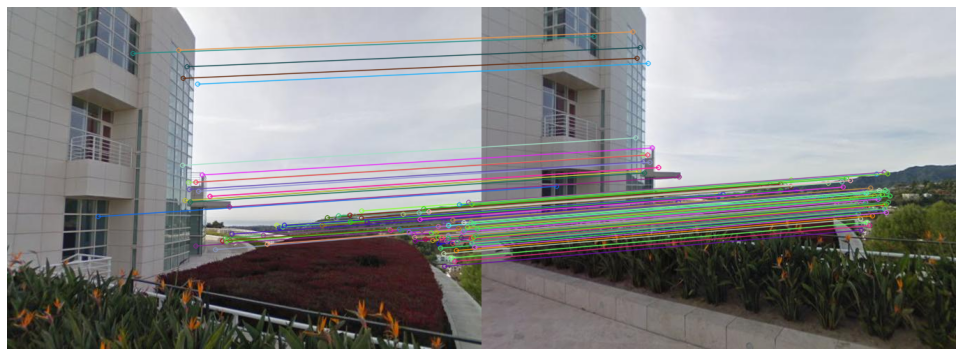

In [45]:
# Load best match image and matches
best_match_img = cv.cvtColor(cv.imread('./Dataset/train/' + best_img_name + '.jpg'), cv.COLOR_RGB2BGR)

# Get matching points for both images
pts_query = np.float32([kp_query[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
pts_match = np.float32([kp_match[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)

# Get transformation matrix and list of succesful matches
H, status = cv.findHomography(pts_query, pts_match, cv.RANSAC, ransacReprojThreshold = 5, maxIters = 10)
success = status.ravel().tolist()
draw_params = dict(matchesMask = success, flags = 2)

# Draw matches between both images
matches_img = cv.drawMatches(img, kp_query, best_match_img, kp_match, good_matches, None, **draw_params)

# Plot
plt.subplots(figsize = (17, 17))
plt.imshow(matches_img)
plt.axis('off')
plt.show()

In [19]:
for img_path in img_paths:
    img = cv.imread(img_path)
    size = img.shape[:2]
    
    if size != (490, 680):
        print('different size')

    